Historical data loaded successfully.


C:\Users\raman\AppData\Local\Temp\ipykernel_31716\234862367.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Fill missing values forward
C:\Users\raman\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0142 - val_loss: 0.0093
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 4.6552e-04 - val_loss: 0.0030
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 2.2107e-04 - val_loss: 0.0035
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.0111e-04 - val_loss: 0.0032
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 1.8723e-04 - val_loss: 0.0023
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.8438e-04 - val_loss: 0.0022
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 2.0897e-04 - val_loss: 0.0027
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 1.8107e-04 - val_loss: 0.0024
Epoch 9/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 1.8524e-04 - val_loss: 0.0017
Epoch 10/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 1.7937e-04 - val_loss: 0.0018
Epoch 11/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 1.6046e-04 - val_loss: 0.0017
Epoch 12/20
75/75 ━━━━━

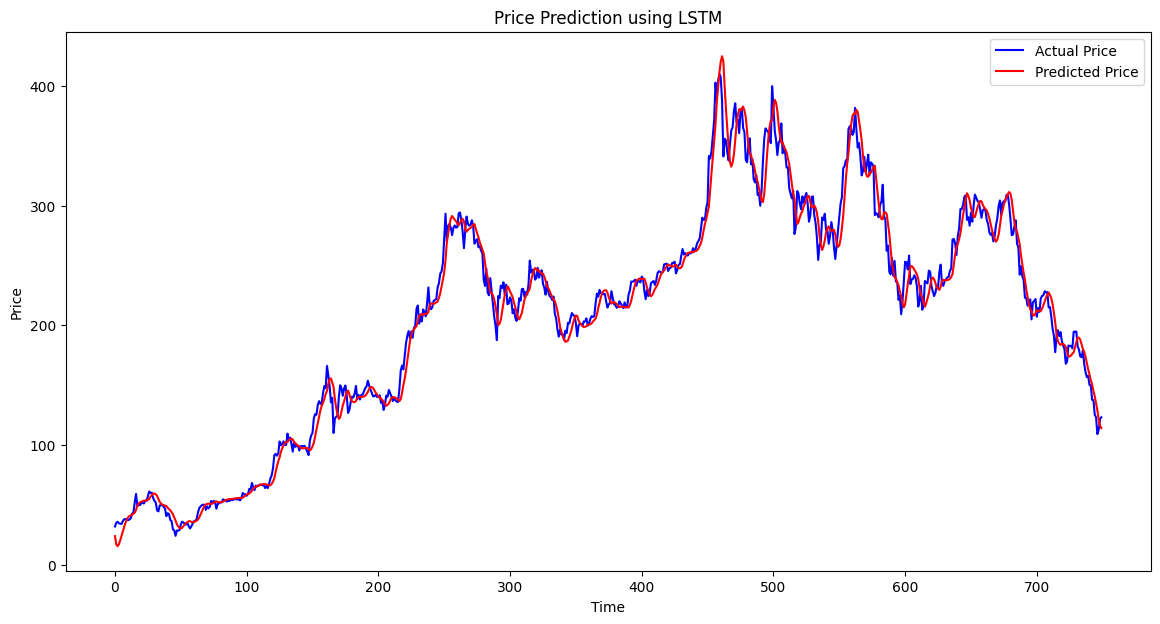

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load and preprocess historical data
historical_data = load_historical_data()
historical_data = preprocess_data(historical_data)

# Scaling data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(historical_data['Close'].values.reshape(-1, 1))

# Create a function for creating the dataset with lagged features
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

# Prepare data with a look-back window (e.g., 30 days)
look_back = 30
X, y = create_dataset(scaled_data, look_back)

# Reshape X for LSTM [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the predictions vs. actual prices
plt.figure(figsize=(14, 7))
plt.plot(actual_prices, label='Actual Price', color='blue')
plt.plot(predictions, label='Predicted Price', color='red')
plt.title('Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
